# README

Para las Tareas de la Clase y el proyecto final, se trabajra con una base de datos de sondeos electricos verticales,
los cuales fueron adquiridos durante multiples campañas de exploracion a lo largo de 5 años, los cuales fueron 
procesados e interpretados en cada situacion, particularmente se cuenta con sitios en cullos sondeos se identificaron 
acuiferos, superficiales y profundos, los cuales seran nuestro foco de estudio de este curso.

# Tarea 1 & Tarea 2

Tarea 1

-   Crear, modificar o eliminar columnas
-   Filtrar registros
-   Crear subconjutos de datos
-  Crear grupos de datos 
  
Tarea 2

-   Calcula estadísticos descriptivos básicos para tus datos
-   Haz una matriz de correlación de tus datos y escribe algunas interpretaciones de la misma
-   Realiza alguna prueba de hipótesis a partir de las conclusiones que hayas sacado de la matriz de correlación
-   Presenta tus resultados gráficamente



Para este proyecto se trabajaran con datos de Resisitividad electrica, adquiridos durante campañas de exploracion en 
distintas zonas de mexico, por privacidad y uso practico se realizaron algunos cambios en el nombres de personal y 
ubicaciones geografica (para mejor manejo de los datos se cosidero un cuadrante de la ciudad de San Nicolas De los 
Garza como sitio de estudio).

Los datos constan de los siguinetes elementos:



- Sitio de estudio representado por la clave asignada, numero de sondeo, sitio y localidad o solicitante.
- Personal Tecnico que realizo el levantamiento de los datos
- Fecha de Adquicicion de los Datos
- Zona datum UTM
- Coordenada Este 
- Cooredenada Norte
- Altitud 
- Profundidad de muestreo
- K Factor Geometrico de Arreglo Schlumberger
- Distancia Media entre los Electrodos A y B 
- Distancia entre los Electrodos A y B
- Distancia Media entre los Electrodos M y N
- La quinta parte de la Distancia entre los Electrodos M y N
- Distancia entre los Electrodos M y N
- Potencia Natural 1
- Potencial Inducido 1
- Corrente Inyectada 1
- Potencia Natural 2
- Potencial Inducido 2
- Corrente Inyectada 2
- Potencia Natural 3
- Potencial Inducido 3
- Corrente Inyectada 3
- Media del Potencial Natural
- Media Potencial Inducido
- Media de las Diferencias entre Potencial Inducido y Potencial Natural
- Media de la Correiente Inyectada
- Resistividad electrica Apatente 1
- Resistividad electrica Apatente 2
- Resistividad electrica Apatente 3
- Media de las Resisitividad Electrica 1 2 y 3
- Resisitividad Alectrica Apatente Final


### Preparacion de entorno

se importaran los elementos que se usaran para realizar las tareas 1 y 2.


In [62]:
import pandas as pd 

from IPython.display import Markdown

import numpy as np

import math

In [63]:
BD_RST = pd.read_csv("../Base de Datos Resisterra/DB-RST.csv")

In [64]:
BD_RST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sitio     647 non-null    object 
 1   OPERADOR  647 non-null    object 
 2   FECHA     647 non-null    object 
 3   ZONA      647 non-null    object 
 4   ESTE      647 non-null    float64
 5   NORTE     647 non-null    float64
 6   ALTITUD   647 non-null    int64  
 7   Z         647 non-null    float64
 8   K         647 non-null    float64
 9   AB/2      647 non-null    float64
 10  AB        647 non-null    int64  
 11  MN/2      647 non-null    float64
 12  AB/5      647 non-null    float64
 13  MN        647 non-null    float64
 14  AB/20     647 non-null    float64
 15  Pn1       647 non-null    float64
 16  Pi1       647 non-null    float64
 17  I1        647 non-null    float64
 18  Pn2       647 non-null    float64
 19  Pi2       647 non-null    float64
 20  I2        647 non-null    float6

Aplicando la siguiente linea podremos observar la tabal correspondeinte a la base de datos BD_RST como tabla en $LaTex$

In [65]:
##  display(Markdown(BD_RST.to_markdown(index=False)))

Creamos una copia de La Base de datos para evitar modificar el documento raiz

In [66]:
DB_copy = BD_RST.copy()

DB_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sitio     647 non-null    object 
 1   OPERADOR  647 non-null    object 
 2   FECHA     647 non-null    object 
 3   ZONA      647 non-null    object 
 4   ESTE      647 non-null    float64
 5   NORTE     647 non-null    float64
 6   ALTITUD   647 non-null    int64  
 7   Z         647 non-null    float64
 8   K         647 non-null    float64
 9   AB/2      647 non-null    float64
 10  AB        647 non-null    int64  
 11  MN/2      647 non-null    float64
 12  AB/5      647 non-null    float64
 13  MN        647 non-null    float64
 14  AB/20     647 non-null    float64
 15  Pn1       647 non-null    float64
 16  Pi1       647 non-null    float64
 17  I1        647 non-null    float64
 18  Pn2       647 non-null    float64
 19  Pi2       647 non-null    float64
 20  I2        647 non-null    float6

Eliminaremos columnas que no son relevantes para el estudio como son AB/5, AB/20, PPn, PPi, PU, PI, Rha, Rha, Rha, Prom-Rha;
Para poder Realizar esta accion usaremos $.drop$

In [67]:
DB_copy.drop(columns = ['AB/5', 'AB/20', 'PPn', 'PPi', 'PU', 'PI', 'Rha', 'Rha', 'Rha', 'Prom-Rha'], inplace = True)

In [68]:
DB_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sitio     647 non-null    object 
 1   OPERADOR  647 non-null    object 
 2   FECHA     647 non-null    object 
 3   ZONA      647 non-null    object 
 4   ESTE      647 non-null    float64
 5   NORTE     647 non-null    float64
 6   ALTITUD   647 non-null    int64  
 7   Z         647 non-null    float64
 8   K         647 non-null    float64
 9   AB/2      647 non-null    float64
 10  AB        647 non-null    int64  
 11  MN/2      647 non-null    float64
 12  MN        647 non-null    float64
 13  Pn1       647 non-null    float64
 14  Pi1       647 non-null    float64
 15  I1        647 non-null    float64
 16  Pn2       647 non-null    float64
 17  Pi2       647 non-null    float64
 18  I2        647 non-null    float64
 19  Pn3       647 non-null    float64
 20  Pi3       646 non-null    float6

In [69]:
DB_copy

,sitio,OPERADOR,FECHA,ZONA,ESTE,NORTE,ALTITUD,Z,K,AB/2,...,I1,Pn2,Pi2,I2,Pn3,Pi3,I3,Rha.1,Rha.2,Real-Rha
0,S1-TV-VLH,JOSE JAVIER TOVON SANCHEZ,05/11/2003,14R,370462.31,2850554.93,489,1.8,56.549,3.0,...,136.0,-11.0,30.0,137.0,-11.0,31.0,137.0,16.9000,17.3,17.24
1,S1-TV-VLH,JOSE JAVIER TOVON SANCHEZ,05/11/2003,14R,370462.31,2850554.93,489,2.4,100.531,4.0,...,122.0,-11.0,20.0,121.0,-11.0,21.0,122.0,25.8000,26.4,25.89
2,S1-TV-VLH,JOSE JAVIER TOVON SANCHEZ,05/11/2003,14R,370462.31,2850554.93,489,3.0,157.080,5.0,...,81.0,-10.0,14.0,78.0,-10.0,14.0,77.0,48.3000,49,47.94
3,S1-TV-VLH,JOSE JAVIER TOVON SANCHEZ,05/11/2003,14R,370462.31,2850554.93,489,3.0,31.416,5.0,...,165.0,-32.0,12.0,166.0,-32.0,13.0,165.0,8.3000,8.6,8.49
4,S1-TV-VLH,JOSE JAVIER TOVON SANCHEZ,05/11/2003,14R,370462.31,2850554.93,489,4.8,80.425,8.0,...,158.0,-33.0,13.0,157.0,-33.0,14.0,158.0,23.6000,23.9,23.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,S3-HIGA,IRVIN RAMIREZ PEREZ,12/10/2022,14R,370645.67,2848071.60,502,78.0,2638.938,130.0,...,792.0,-49.0,-47.0,798.0,-49.0,-43.0,804.0,19.7920,19.6447,17.57
643,S3-HIGA,IRVIN RAMIREZ PEREZ,12/10/2022,14R,370645.67,2848071.60,502,84.0,3063.053,140.0,...,458.0,-47.0,-43.0,484.0,-47.0,-44.0,461.0,19.2645,19.0252,21.61
644,S3-HIGA,IRVIN RAMIREZ PEREZ,12/10/2022,14R,370645.67,2848071.60,502,90.0,3518.584,150.0,...,745.0,-46.0,-42.0,738.0,-46.0,-42.0,751.0,18.8664,19.7951,18.98
645,S3-HIGA,IRVIN RAMIREZ PEREZ,12/10/2022,14R,370645.67,2848071.60,502,102.0,4523.893,170.0,...,731.0,-45.0,-41.0,751.0,-45.0,-41.0,733.0,24.7545,24.553,24.61


Como primer paso reagruparemos la informacion a fin de visualizar primero los Datos que queremos separar.

Acontinuacion crearemos una Data Frame en el cual se integraran los archivos de posicion geografica para, afin de generar una visualizacion del sitio de estudio, en el caso particular, todos lo spuntos se agruparon en un area correspondeitne al municipio de san nicolas de los garzar, con la finalidad de supervisar la respuesta y la relacion entre los comportamientos y respues geoelectrica.

In [70]:
geo_DB = DB_copy.groupby( ['sitio','ZONA','ESTE','NORTE','ALTITUD'])
  
geo_DB.first()


,,,,,OPERADOR,FECHA,Z,K,AB/2,AB,MN/2,MN,Pn1,Pi1,I1,Pn2,Pi2,I2,Pn3,Pi3,I3,Rha.1,Rha.2,Real-Rha
sitio,ZONA,ESTE,NORTE,ALTITUD,,,,,,,,,,,,,,,,,,,,
S1-AMEBSA,14R,370089.22,2849714.46,495,JOSE JAVIER TOVON SANCHEZ,09/08/2004,0.6,3.141593,1.0,2,0.50,1.0,19.6,176.0,-9.5,20.0,175.0,-9.5,19.7,174.0,-9.5,-51.300000,14865.4,8827.00
S1-BMEBSA,14R,368966.92,2848868.32,504,JOSE JAVIER TOVON SANCHEZ,13/04/2006,0.6,3.141593,1.0,2,0.50,1.0,37.0,150.0,13.0,31.0,153.0,12.0,31.0,153.0,12.0,31.900000,31.9,28.44
S1-HIGA,14R,371282.17,2848586.46,495,JOSE JAVIER TOVON SANCHEZ,10/10/2022,4.2,75.398000,7.0,14,1.00,2.0,-34.0,-25.0,48.0,-35.0,-25.0,48.0,-36.0,-26.0,48.0,15.708000,15.708,15.45
S1-IXCA,14R,371188.96,2849350.46,492,IRVIN RAMIREZ PEREZ,11/08/2020,4.2,75.398000,7.0,14,1.00,2.0,86.0,158.0,301.0,82.0,159.0,201.0,76.0,147.0,297.0,18.340100,18.5279,18.25
S1-MOR,14R,371497.03,2850196.37,486,JOSE JAVIER TOVON SANCHEZ,03/02/2021,4.2,75.400000,7.0,14,1.00,2.0,-200.0,411.0,181.0,-195.0,465.0,162.0,-194.0,322.0,155.0,259.036800,252.9181,264.93
S1-TLACO,14R,371669.76,2849650.58,490,JOSE JAVIER TOVON SANCHEZ,05/02/2021,4.2,75.400000,7.0,14,1.00,2.0,-31.0,-25.0,8.0,-29.0,-23.0,9.0,-30.0,-24.0,8.0,58.643100,#¡DIV/0!,55.71
S1-TV-VLH,14R,370462.31,2850554.93,489,JOSE JAVIER TOVON SANCHEZ,05/11/2003,1.8,56.549000,3.0,6,0.25,0.5,-11.0,31.0,136.0,-11.0,30.0,137.0,-11.0,31.0,137.0,16.900000,17.3,17.24
S1-ZAUTLA,14R,370965.91,2849902.27,491,JOSE JAVIER TOVON SANCHEZ,20/09/2010,1.2,12.566000,2.0,4,1.00,2.0,22.0,1747.0,206.0,1.0,1743.0,209.0,9.0,1763.0,207.0,106.288000,106.4803,105.92
S1AP-EB,14R,370592.78,2849118.76,498,JOSE JAVIER TOVON SANCHEZ,13/06/2020,0.6,3.141590,1.0,2,0.50,1.0,22.0,2120.0,73.0,22.0,2120.0,85.0,22.0,2120.0,83.0,77.541899,79.41037816,75.96


In [71]:
## NOTA no se puede generar una nueva tabla aprtir de de .groupby generados, tendra que ser desde el DF origen.

GEO_position = DB_copy.loc[0:646,['sitio','ZONA','ESTE','NORTE','ALTITUD']]

In [72]:
GEO_position

,sitio,ZONA,ESTE,NORTE,ALTITUD
0,S1-TV-VLH,14R,370462.31,2850554.93,489
1,S1-TV-VLH,14R,370462.31,2850554.93,489
2,S1-TV-VLH,14R,370462.31,2850554.93,489
3,S1-TV-VLH,14R,370462.31,2850554.93,489
4,S1-TV-VLH,14R,370462.31,2850554.93,489
...,...,...,...,...,...
642,S3-HIGA,14R,370645.67,2848071.60,502
643,S3-HIGA,14R,370645.67,2848071.60,502
644,S3-HIGA,14R,370645.67,2848071.60,502
645,S3-HIGA,14R,370645.67,2848071.60,502


generaremos un archivo solo con los datos de salida relevantes para este estudio. y generaremos una copia para trabajar con ella

In [73]:
res_geo = DB_copy.loc[0:646,['sitio','ESTE','NORTE','ALTITUD','Z','AB','MN','Real-Rha']]

res_geo_copy = res_geo.copy()

Renombraremos la columna Real-Rha por res_ap

In [74]:
res_geo_copy.rename(columns={'Real-Rha':'res_ap'},inplace=True)

res_geo_copy.rename(columns={'res_ap':'Rha'},inplace=True)

res_geo_copy

,sitio,ESTE,NORTE,ALTITUD,Z,AB,MN,Rha
0,S1-TV-VLH,370462.31,2850554.93,489,1.8,6,0.5,17.24
1,S1-TV-VLH,370462.31,2850554.93,489,2.4,8,0.5,25.89
2,S1-TV-VLH,370462.31,2850554.93,489,3.0,10,0.5,47.94
3,S1-TV-VLH,370462.31,2850554.93,489,3.0,10,2.5,8.49
4,S1-TV-VLH,370462.31,2850554.93,489,4.8,16,2.5,23.63
...,...,...,...,...,...,...,...,...
642,S3-HIGA,370645.67,2848071.60,502,78.0,260,20.0,17.57
643,S3-HIGA,370645.67,2848071.60,502,84.0,280,20.0,21.61
644,S3-HIGA,370645.67,2848071.60,502,90.0,300,20.0,18.98
645,S3-HIGA,370645.67,2848071.60,502,102.0,340,20.0,24.61


Generaremos la estadistica para los siguientes datos: Z, AB, MN, Real-Rha.

llamamos a cada columna por separado y la asignamos a una variable definida

In [75]:
##llamamos cada colubna que trabajaremos
pro_exploracion = res_geo_copy.Z
apertura_ab = res_geo_copy.AB 
apertura_mn = res_geo_copy.MN 
resisitividad = res_geo_copy.Rha
## eliminamos las posiciones que precentan ceros para evitar influir en la estadistica
resisitividad.fillna(0, inplace=True) #---> no fue  necesario hacerlo

## generamos listas de cada columna
list_pro_exploracion = list(pro_exploracion)
list_apertura_ab = list(apertura_ab)
list_pertura_mn = list(apertura_mn)
list_resisitividad = list(resisitividad)


In [76]:
res_geo_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sitio    647 non-null    object 
 1   ESTE     647 non-null    float64
 2   NORTE    647 non-null    float64
 3   ALTITUD  647 non-null    int64  
 4   Z        647 non-null    float64
 5   AB       647 non-null    int64  
 6   MN       647 non-null    float64
 7   Rha      647 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 40.6+ KB


In [77]:
res_geo_copy.describe()


,ESTE,NORTE,ALTITUD,Z,AB,MN,Rha
count,647.000000,6.470000e+02,647.000000,647.000000,647.000000,647.000000,647.000000
mean,370538.884451,2.849340e+06,495.522411,43.881144,146.270479,10.199382,547.722179
std,786.395996,6.835880e+02,4.972280,54.804184,182.680614,11.176378,1189.932359
min,368966.920000,2.848072e+06,486.000000,0.600000,2.000000,0.500000,-257.050000
25%,369975.800000,2.848816e+06,491.000000,6.000000,20.000000,5.000000,28.855000
50%,370645.670000,2.849338e+06,495.000000,27.000000,90.000000,5.000000,115.580000
75%,371188.960000,2.849887e+06,500.000000,59.100000,197.000000,20.000000,384.290000
max,371852.460000,2.850555e+06,504.000000,300.000000,1000.000000,100.000000,9318.620000


## Estadistica  descriptiva basica de Profundidades y resistividades



In [78]:
import statistics

In [79]:

media_Rha = statistics.mean(res_geo_copy.Rha)
media_flot_Rha = statistics.fmean(res_geo_copy.Rha)
media_baja_Rha = statistics.median_low(res_geo_copy.Rha)
media_alta_Rha = statistics.median_high(res_geo_copy.Rha)
moda_Rha = statistics.mode(res_geo_copy.Rha)
cuartiles_Rha = statistics.quantiles(res_geo_copy.Rha, n=4)
varianza_Rha = statistics.variance(res_geo_copy.Rha)
desviacion_est_Rha = statistics.stdev(res_geo_copy.Rha)
valor_max_Rha = max(res_geo_copy.Rha)
valor_min_Rha = min(res_geo_copy.Rha)


la desviacion estandar es demasiado alta

In [80]:
print('media= ',media_Rha)
print('media con flotante= ',media_flot_Rha)
print('media baja de los datos= ', media_baja_Rha)
print('media alta de los datos= ', media_alta_Rha)
print('moda= ', moda_Rha)
print('cuartiles= ', cuartiles_Rha)
print('varianza= ', varianza_Rha)
print('desviacion estandar= ', desviacion_est_Rha)
print('valor maximo= ', valor_max_Rha)
print('valor minimo= ', valor_min_Rha)

media=  547.7221792890263
media con flotante=  547.7221792890263
media baja de los datos=  115.58
media alta de los datos=  115.58
moda=  12.87
cuartiles=  [28.51, 115.58, 384.56]
varianza=  1415939.0201681536
desviacion estandar=  1189.9323594928217
valor maximo=  9318.62
valor minimo=  -257.05


In [81]:
import matplotlib.pyplot as plt

visualizaremos los datos mediante histogramas para identificar las frecuencias

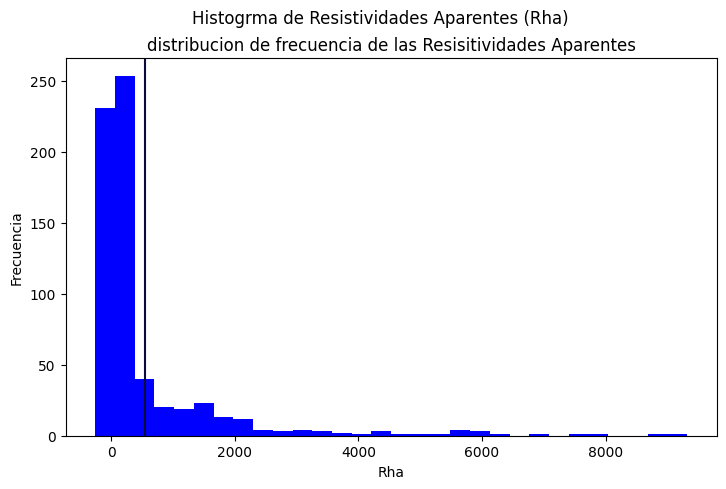

In [82]:
plt.figure(figsize = (8.4, 4.9))
plt.hist(res_geo_copy.Rha, bins=30, color='blue')
plt.axvline(
    x = media_Rha,
    c='#0B0B3B',
    label = '$\\bar{x}$'
)

plt.title('distribucion de frecuencia de las Resisitividades Aparentes')
plt.suptitle('Histogrma de Resistividades Aparentes (Rha)')
plt.xlabel('Rha')
plt.ylabel('Frecuencia')
plt.savefig('../Articulo/histogram_Rha.png')
plt.show()


ya qye no nos aporta informcaion tendremos que filtrar todos los valores por arriba de 2000 ohm*m

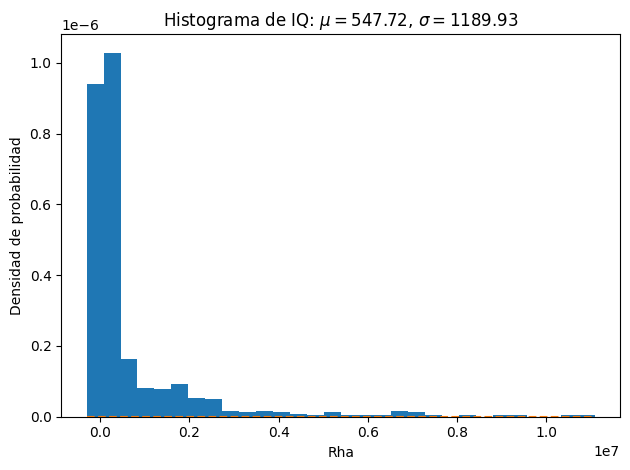

In [83]:



# example data
mu = media_Rha  # mean of distribution
sigma = desviacion_est_Rha  # standard deviation of distribution
x = mu + sigma * res_geo_copy.Rha[:]

num_bins = 30

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Rha')
ax.set_ylabel('Densidad de probabilidad')
ax.set_title(r'Histograma de IQ: $\mu=547.72$, $\sigma=1189.93$')

# Tweak spacing to prevent clipping of ylabel@
fig.tight_layout()
plt.show()

apartir de la distribucion de las frecias podemos definir los datos como no parametricos ya que no siguen una tendencia normal 

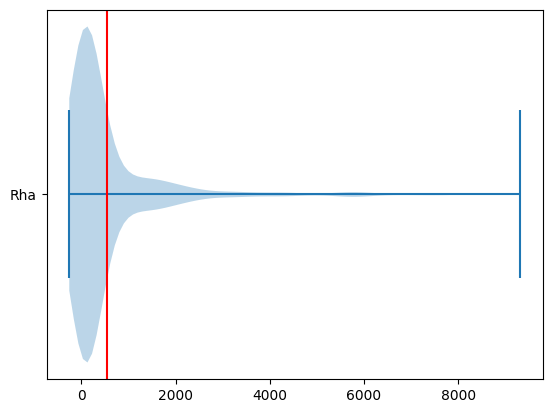

In [84]:
plt.figure()
plt.violinplot(res_geo_copy.Rha, vert=False)
plt.axvline( # Dibujar una línea vertical
    x = media_Rha, # En la media de los datos
    c = '#ff0000', # De color hexadecimal rojo
    label = '$\\bar{x}$' # con este identificador
)
plt.yticks([1], labels=['Rha'])
plt.show()

### Matrix de correlacion 


In [85]:
res_geo_copy.columns

Index(['sitio', 'ESTE', 'NORTE', 'ALTITUD', 'Z', 'AB', 'MN', 'Rha'], dtype='object')

In [86]:

df_res_geo = res_geo_copy.pivot_table('Rha',['ESTE', 'NORTE'], 'Z')
df_res_geo

,Z,0.6,0.9,1.2,1.8,2.4,3.0,4.2,4.8,5.4,6.0,...,132.0,138.0,144.0,150.0,156.0,180.0,210.0,240.0,270.0,300.0
ESTE,NORTE,,,,,,,,,,,,,,,,,,,,,
368966.92,2848868.32,28.44,NaN,78.025,NaN,NaN,253.700,837.50,1127.31,1632.77,408.035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369168.62,2849201.65,4.08,NaN,2.100,NaN,NaN,19.120,37.46,NaN,59.28,231.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369285.27,2849541.66,386.24,NaN,482.650,NaN,1147.73,767.010,557.15,656.85,443.77,396.490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369390.35,2849887.03,532.31,NaN,823.820,NaN,800.90,1019.710,716.54,638.22,367.57,286.410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369421.77,2850209.05,87.80,NaN,95.970,NaN,182.07,31.400,34.87,40.21,43.03,40.765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369430.09,2850473.94,9.42,NaN,14.210,NaN,NaN,19.530,NaN,24.75,NaN,22.340,...,NaN,138.12,NaN,132.195,NaN,207.130,207.13,132.81,NaN,NaN
369736.22,2848626.09,0.38,NaN,1.230,NaN,NaN,6.230,12.75,17.14,351.40,272.610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369854.95,2848990.42,140.66,NaN,60.705,NaN,NaN,130.530,5933.81,2288.34,1721.36,1068.520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369975.80,2849338.50,33.49,NaN,64.125,NaN,NaN,393.950,384.02,566.35,249.84,255.910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 640x480 with 0 Axes>

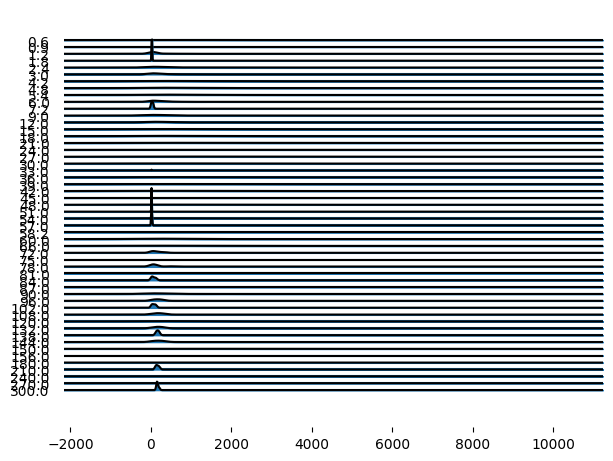

In [87]:
from joypy import joyplot

plt.figure()
joyplot(res_geo_copy, by='Z', column='Rha')
plt.show()

In [88]:
corr_ = df_res_geo.corr()
corr_

Z,0.6,0.9,1.2,1.8,2.4,3.0,4.2,4.8,5.4,6.0,...,132.0,138.0,144.0,150.0,156.0,180.0,210.0,240.0,270.0,300.0
Z,,,,,,,,,,,,,,,,,,,,,
0.6,1.000000,NaN,-0.065404,NaN,-0.153633,0.249194,-0.015935,-0.114712,-0.074740,-0.004786,...,NaN,1.0,NaN,0.999633,NaN,1.000000,NaN,1.000000,NaN,NaN
0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.2,-0.065404,NaN,1.000000,NaN,0.854238,0.894291,-0.002126,0.087236,-0.150023,0.243909,...,NaN,1.0,NaN,0.887498,NaN,1.000000,NaN,1.000000,NaN,NaN
1.8,NaN,NaN,NaN,1.0,-1.000000,-1.000000,NaN,-1.000000,NaN,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.4,-0.153633,NaN,0.854238,-1.0,1.000000,0.866990,0.724697,0.909467,0.983415,0.620411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,0.249194,NaN,0.894291,-1.0,0.866990,1.000000,0.033691,0.240324,-0.077232,0.367883,...,NaN,1.0,NaN,0.994496,NaN,1.000000,NaN,1.000000,NaN,NaN
4.2,-0.015935,NaN,-0.002126,NaN,0.724697,0.033691,1.000000,0.927180,0.744671,0.829099,...,1.0,NaN,1.0,1.000000,NaN,1.000000,NaN,1.000000,1.000000,NaN
4.8,-0.114712,NaN,0.087236,-1.0,0.909467,0.240324,0.927180,1.000000,0.871414,0.958673,...,NaN,1.0,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
5.4,-0.074740,NaN,-0.150023,NaN,0.983415,-0.077232,0.744671,0.871414,1.000000,0.807793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


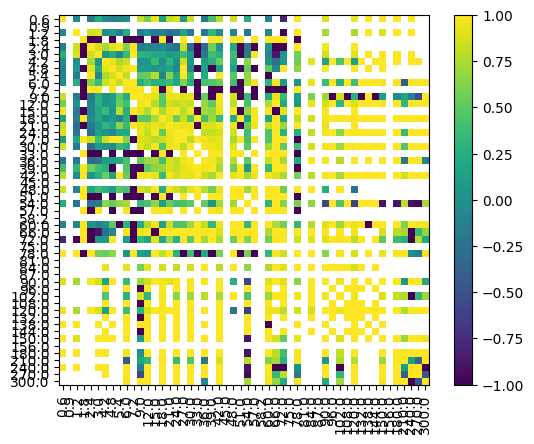

In [89]:
corr_ = df_res_geo.corr()

ticks_ = list(range(len(df_res_geo.columns)))
plt.figure()
plt.imshow(corr_)
plt.xticks(ticks = ticks_, labels = df_res_geo.columns, rotation = 90)
plt.yticks(ticks = ticks_, labels = df_res_geo.columns)
plt.clim(vmin = -1, vmax =1)
plt.colorbar()
plt.show()

apartir de la prueva de correlacion se puedo identificar el siguiente comportamiento

1.- Tenemos una alta correlacion entre los valores de la prueva, entre la profundidad y el aumento de la resistividad, este comportamiento es consistente con los valores
2.- En cuanto a los valores de baja correlacion, nos aportan informacion valiosa ya que pueden estar representando una anomalia en la distribucion esperada, traduciendose una dispercion de valores de Rha, es decir una baja correalacion de los valores, representando valores de interes para la exploracion geohidrica.

In [90]:
from scipy.stats import norm 

# Tarea 3

-   Aplica los modelos de selección de características cuidando los supuestos de cada modelo
-   Busca una o varias métricas para seleccionar características en literatura relacionada con tu problema (cita tus fuentes)
-   Con base en tu investigación, determina las características más relevantes de tu conjunto de datos
-   Discute por qué crees que las características seleccionadas son las más relevantes y por qué el resto quedaron excluidas en la selección

# Tarea 4

-   Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes
-   Elegir alguna métrica para determinar número de grupos, usarla y discutirla
-   Busca alguna revista científica que publique trabajos relacionados con el tuyo
-   Crea artículo mediante Latex con base en los lineamientos de la revista elegida y redacta ahí tus resultados, discusiones y bibliografía
-   Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

# Tarea 5

-   Investigar sobre algoritmos supervisados que puedan aplicarse a tu problema. Da un panorama sobre el modelo matemático que emplean y explica por qué conviene utilizarlo
-   Investigar sobre métricas para analizar los errores de tus datos y discutirla (generalmente se usan MAE, MAPE, RMSE, MSE...)
-   Aplicar al menos un algoritmo supervisado a tus datos para predecir alguna variable (puede ser interpolación o extrapolación)
-   Actualiza literatura relacionada, metodología, resultados y discusión en tu artículo
-   Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

# Tarea 6

-   Generar la parte de metodología del artículo, explicando los métodos usados con base en la literatura que los sustenta.

# Tarea 7

-   Revisa en la literatura las métricas de desempeño que se utilizan en tu problema.
-   Elige al menos una métrica para aplicar a tus modelos.
-   Reporta estos hallazgos en el marco teórico de tu artículo.

# Tarea 8

-   Realizar un diseño de experimentos para tu problema de estudio en la que indiques los niveles y tratamientos de interés.
-   Reporta en la metodología de tu artículo el diseño de experimentos que realizaste.